In [1]:
import ROOT as root
import numpy as np
import matplotlib.pyplot as plt


Welcome to JupyROOT 6.14/04


In [2]:
fileROOT = root.TFile('../SinglePhoto/singlePhoto22mV.root')#"chargeDataBlu.root") #nome del rootfile
tree = fileROOT.Get("t1") #nome del datatree

nDat = 1024*4 #numero dati per evento
nEvts = tree.GetEntries() #numero di eventi
n = 1024
#creo due array vuoti per salvare wave_array e time_array del .root

wave = np.zeros((nEvts,nDat))
time = np.zeros((nEvts,nDat))

#eseguo un ciclo sul tree e salvo i dati dentro gli array come ulteriori array...
#quindi adesso avrò array 2d in cui il primo indice si riferisce all'evento e il secondo al dato 
#contenuto dentro quell'evento
i=0
for dat in tree:
    wave[i] = np.array(dat.wave_array)
    time[i] = np.array(dat.time_array)
    i = i+1


In [3]:
waveCh1 = np.zeros((nEvts,n))
waveCh2 = np.zeros((nEvts,n))
waveCh3 = np.zeros((nEvts,n))
waveCh4 = np.zeros((nEvts,n))

timeCh1 = np.zeros((nEvts,n))
timeCh2 = np.zeros((nEvts,n))
timeCh3 = np.zeros((nEvts,n))
timeCh4 = np.zeros((nEvts,n))


print(waveCh1.shape , nDat/4)

for i in range(nEvts):
    for j in range(nDat):
        if j < nDat/4:
            waveCh1[i][j] = wave[i][j]
            timeCh1[i][j] = time[i][j]
        elif j >= nDat/4 and j < nDat/2:
            waveCh2[i][j-n] = wave[i][j]
            timeCh2[i][j-n] = time[i][j]
        elif j >= nDat/2 and j < nDat*3/4:
            waveCh3[i][j-2*n] = wave[i][j]
            timeCh3[i][j-2*n] = time[i][j]
        elif j >= nDat*3/4: 
            waveCh4[i][j-3*n] = wave[i][j]
            timeCh4[i][j-3*n] = time[i][j]


((1000, 1024), 1024)


In [4]:
for i in range(nEvts):
    if min(waveCh4[i]) < -110 and waveCh4[i].argmin() < 5: 
        print(i , waveCh4[i].argmin() , timeCh4[i][waveCh4[i].argmin()])
        j = j+1
print(j , 8)

(156, 1, 0.9928385615348816)
(245, 1, 0.9928385615348816)
(316, 1, 0.9928385615348816)
(386, 1, 0.9928385615348816)
(477, 1, 0.9928385615348816)
(648, 1, 0.9928385615348816)
(689, 1, 0.9928385615348816)
(690, 1, 0.9928385615348816)
(717, 1, 0.9928385615348816)
(857, 1, 0.9928385615348816)
(4105, 8)


In [5]:
for i in range(nEvts):
    waveCh4[i] = waveCh4[i]-np.mean(waveCh4[i][100:200])
    

In [6]:
waveCh4A = np.zeros((nEvts-8,n))
R = 50 #resistenza in Ohm

j=0
for i in np.arange(1,nEvts):
    #butto gli eventi con il picco strano
    if min(waveCh4[i]) >= -110 or (min(waveCh4[i])< -110  and waveCh4[i].argmin() != 1):
        #seleziono solo gli eventi che hanno picchi sotto i 50mV (è una prova)
        if min(waveCh4[i]) >= -30: 
            waveCh4A[j] = waveCh4[i]/R #conversione dati Tensione -> dati Corrente
            j = j+1
    else: 1 
        #print(min(waveCh4[i]) , waveCh4[i].argmin() , i) #check
        
        
print(j+1)#check
integral = np.zeros(j)
#Eseguo l'Integrale
for i in range(j):
    integral[i] = sum(-waveCh4A[i])


118


Warning in <TFile::Append>: Replacing existing TH1: h1 (Potential memory leak).


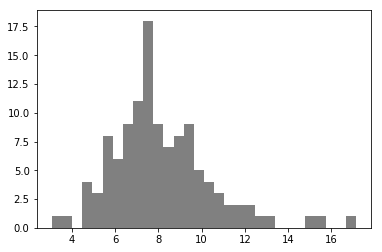

In [22]:
from ROOT import TMath , TCanvas , TGraph , TH1D

y,x,_ = plt.hist(integral , bins = 30 , density = False , label = 'Data' , color = 'grey')
h1 = TH1D( 'h1', 'This is the px distribution', 100, -30, 30 )

for i in integral:
    h1.Fill(i)

In [13]:
c = TCanvas()
g = TGraph(x.size, x.astype(np.double),y.astype(np.double))

fit = g.Fit("gaus" , "S")


****************************************
Minimizer is Minuit / Migrad
Chi2                      =      51.5628
NDf                       =           18
Edm                       =  1.70122e-08
NCalls                    =           68
Constant                  =       17.169   +/-   0.992064    
Mean                      =      7.37575   +/-   0.11988     
Sigma                     =      1.83321   +/-   0.128881     	 (limited)


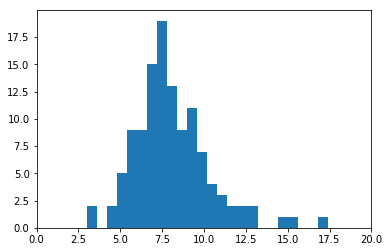

In [18]:
from rootplot import root2matplotlib as r2m

histo1 = r2m.Hist(h1) #permette di leggere l'istogramma già riempito da root
histo1.hist() #fa l'istogramma
#plt.plot(fit)
plt.xlim([0,20])
plt.show() #lo stampa

In [23]:
#richiarmo i parametri di fit di ROOT
a = fit.Get().Parameter(0)
m = fit.Get().Parameter(1)
s = fit.Get().Parameter(2)
print(a,m,s)

#creo delle variabili per stampare il fit con matplotlib
par = [fit.Get().Parameter(i) for i in range(3)]
xx = np.linspace(-30,30,100)

(17.169021283806288, 7.375751353619207, 1.8332053799006196)


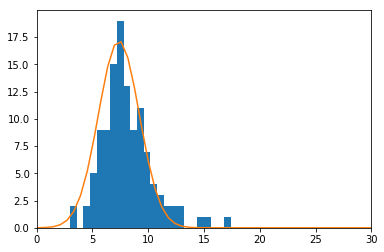

In [25]:
#definisco una funzione gaussiana per la stampa del fit
def gaussian(x, a ,mu, sig):
    return a*np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

#stampo istogramma e funzione
histo1.hist(density=False)
plt.plot(xx,gaussian(xx,*par))
plt.xlim([0,30])
plt.show()